In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Nashville_housing_data_2013_2016.csv to Nashville_housing_data_2013_2016.csv


In [85]:
# load the csv file as a data frame
df = pd.read_csv('Nashville_housing_data_2013_2016.csv')

In [86]:
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,24/01/2013,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,11/01/2013,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,18/01/2013,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,18/01/2013,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,23/01/2013,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Parcel ID                          56636 non-null  object 
 2   Land Use                           56636 non-null  object 
 3   Property Address                   56477 non-null  object 
 4   Suite/ Condo   #                   6109 non-null   object 
 5   Property City                      56477 non-null  object 
 6   Sale Date                          56636 non-null  object 
 7   Sale Price                         56636 non-null  int64  
 8   Legal Reference                    56636 non-null  object 
 9   Sold As Vacant                     56636 non-null  object 
 10  Multiple Parcels Involved in Sale  56636 non-null  object 
 11  Owner Name                         25261 non-null  obj

In [88]:
df.describe()

,Unnamed: 0,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,56636.00000,5.663600e+04,26017.000000,26017.000000,2.601700e+04,2.601700e+04,2.601700e+04,24166.000000,24165.000000,24159.000000,24277.000000,24146.000000
mean,28317.50000,3.272111e+05,0.498903,4356.215782,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.749224,3.090029,1.886106,0.283981
std,16349.54926,9.287425e+05,1.570396,2170.348270,1.060405e+05,2.068041e+05,2.810703e+05,1687.017313,26.546141,0.852942,0.961572,0.487905
min,0.00000,5.000000e+01,0.010000,107.000000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,14158.75000,1.350000e+05,0.180000,3126.000000,2.100000e+04,7.590000e+04,1.028000e+05,1239.000000,1948.000000,3.000000,1.000000,0.000000
50%,28317.50000,2.054500e+05,0.270000,3929.000000,2.880000e+04,1.114000e+05,1.485000e+05,1632.000000,1960.000000,3.000000,2.000000,0.000000
75%,42476.25000,3.290000e+05,0.450000,6228.000000,6.000000e+04,1.807000e+05,2.685000e+05,2212.000000,1983.000000,3.000000,2.000000,1.000000
max,56635.00000,5.427806e+07,160.060000,9530.000000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [89]:
df = df.drop(['Unnamed: 0','Parcel ID','Legal Reference','Property Address','Multiple Parcels Involved in Sale','Address','State','Suite/ Condo   #','Owner Name','Address','image','Land Value','Building Value',],axis=1)
#df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [90]:
print("The shape of data is :\n",df.shape)
df = df.drop_duplicates()
print("The shape of data is :\n",df.shape)

The shape of data is :
 (56636, 18)
The shape of data is :
 (53258, 18)


In [91]:
print("No. of duplicate rows dropped :", 56636 - 53258)

No. of duplicate rows dropped : 3378


In [92]:
df.apply(lambda x : sum(x.isnull()))

Land Use               0
Property City        153
Sale Date              0
Sale Price             0
Sold As Vacant         0
City               27416
Acreage            27416
Tax District       27416
Neighborhood       27416
Total Value        27416
Finished Area      29188
Foundation Type    29190
Year Built         29189
Exterior Wall      29189
Grade              29189
Bedrooms           29195
Full Bath          29085
Half Bath          29216
dtype: int64

In [93]:
round(df.isnull().mean() * 100,2)

Land Use            0.00
Property City       0.29
Sale Date           0.00
Sale Price          0.00
Sold As Vacant      0.00
City               51.48
Acreage            51.48
Tax District       51.48
Neighborhood       51.48
Total Value        51.48
Finished Area      54.80
Foundation Type    54.81
Year Built         54.81
Exterior Wall      54.81
Grade              54.81
Bedrooms           54.82
Full Bath          54.61
Half Bath          54.86
dtype: float64

In [14]:
#df.isnull().sum(axis=1)

In [94]:
print("The shape of data is :\n",df.shape)
df1 = df.dropna(thresh=18, axis=0)
print("The shape of data is :\n",df1.shape)
print("The number of rows which are having null values in all the 20 columns :\n",53258 - 23915)

The shape of data is :
 (53258, 18)
The shape of data is :
 (23915, 18)
The number of rows which are having null values in all the 20 columns :
 29343


In [95]:
round(df1.isnull().mean() * 100,2)

Land Use           0.0
Property City      0.0
Sale Date          0.0
Sale Price         0.0
Sold As Vacant     0.0
City               0.0
Acreage            0.0
Tax District       0.0
Neighborhood       0.0
Total Value        0.0
Finished Area      0.0
Foundation Type    0.0
Year Built         0.0
Exterior Wall      0.0
Grade              0.0
Bedrooms           0.0
Full Bath          0.0
Half Bath          0.0
dtype: float64

In [17]:
#df1['Property City'] = df1['Property City'].fillna(df1['Property City'].mode()[0])
#df1['Bedrooms'] = df1['Bedrooms'].fillna(df1['Bedrooms'].mode()[0])
#df1['Half Bath'] = df1['Half Bath'].fillna(df1['Half Bath'].mode()[0])

In [96]:
df1.apply(lambda x : sum(x.isnull()))

Land Use           0
Property City      0
Sale Date          0
Sale Price         0
Sold As Vacant     0
City               0
Acreage            0
Tax District       0
Neighborhood       0
Total Value        0
Finished Area      0
Foundation Type    0
Year Built         0
Exterior Wall      0
Grade              0
Bedrooms           0
Full Bath          0
Half Bath          0
dtype: int64

In [97]:
df1['Sale Year'] = df1['Sale Date'].str[6:10]
df1['Month'] = df1['Sale Date'].str[3:5]
df1['Day'] = df1['Sale Date'].str[:2]

In [98]:
df1['Sale Month'] = df1.Month.map({'01': 'Jan', '02': 'Feb', '03': 'Mar', '04':'Apr','05': 'May',
                                           '06': 'Jun','07': 'Jul','08': 'Aug','09': 'Sep','10': 'Oct',
                                           '11': 'Nov','12': 'Dec'})
df1 = df1.drop(['Month','Day','Sale Date'], axis=1)

In [99]:
df1.head()

,Land Use,Property City,Sale Price,Sold As Vacant,City,Acreage,Tax District,Neighborhood,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month
1,SINGLE FAMILY,NASHVILLE,191500,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,Jan
2,SINGLE FAMILY,NASHVILLE,202000,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,Jan
3,SINGLE FAMILY,NASHVILLE,32000,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,Jan
4,SINGLE FAMILY,NASHVILLE,102000,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,Jan
5,SINGLE FAMILY,NASHVILLE,93736,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,2013,Jan


In [100]:
df1['Sale Year'] = df1['Sale Year'].astype('int')

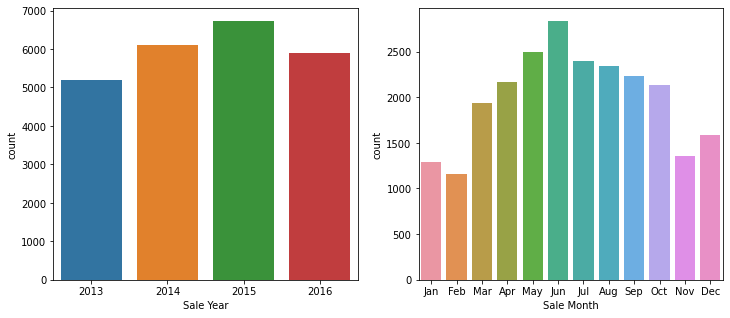

In [26]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='Sale Year', data=df1, ax = axis1)
sns.countplot(x='Sale Month', data=df1, ax = axis2)

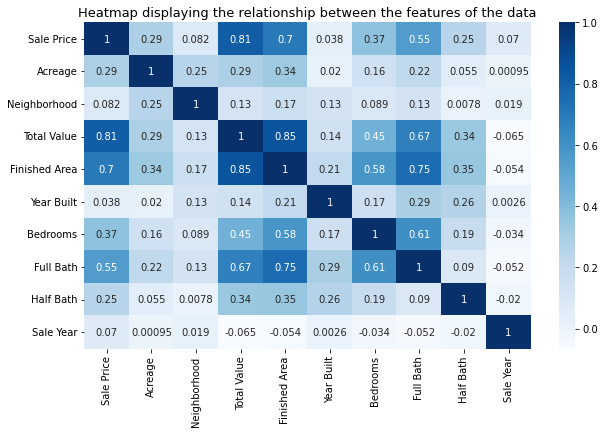

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

In [440]:
#plt.figure(figsize = (10, 7))
#sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
#plt.show()

In [102]:
corr = df1.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:30:2]

Sale Price     Total Value      0.810107
Finished Area  Full Bath        0.752706
Sale Price     Finished Area    0.704551
Full Bath      Total Value      0.671449
Bedrooms       Full Bath        0.612707
Finished Area  Bedrooms         0.582971
Full Bath      Sale Price       0.551185
Bedrooms       Total Value      0.454089
Sale Price     Bedrooms         0.374621
dtype: float64

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23915 entries, 1 to 56616
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Land Use         23915 non-null  object 
 1   Property City    23915 non-null  object 
 2   Sale Price       23915 non-null  int64  
 3   Sold As Vacant   23915 non-null  object 
 4   City             23915 non-null  object 
 5   Acreage          23915 non-null  float64
 6   Tax District     23915 non-null  object 
 7   Neighborhood     23915 non-null  float64
 8   Total Value      23915 non-null  float64
 9   Finished Area    23915 non-null  float64
 10  Foundation Type  23915 non-null  object 
 11  Year Built       23915 non-null  float64
 12  Exterior Wall    23915 non-null  object 
 13  Grade            23915 non-null  object 
 14  Bedrooms         23915 non-null  float64
 15  Full Bath        23915 non-null  float64
 16  Half Bath        23915 non-null  float64
 17  Sale Year   

In [104]:
df1['Full Bath'] = df1['Full Bath'].astype(int)
df1['Half Bath'] = df1['Half Bath'].astype(int)
df1['Bedrooms'] = df1['Bedrooms'].astype(int)

The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [105]:
df_num = df1._get_numeric_data() #drop non-numeric cols

In [106]:
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_num.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,Sale Price,5.384907
1,Acreage,1.599078
2,Neighborhood,5.765620
3,Total Value,10.085042
4,Finished Area,22.046579
5,Year Built,18.841864
6,Bedrooms,24.583589
7,Full Bath,14.392013
8,Half Bath,1.732186


In [108]:
df2 = df1.drop(['Finished Area','Year Built','Full Bath','City'],axis=1)
df_num = df2._get_numeric_data() #drop non-numeric cols
x=df_num.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,Sale Price,5.344723
1,Acreage,1.545435
2,Neighborhood,4.624314
3,Total Value,5.827499
4,Bedrooms,5.832983
5,Half Bath,1.528135


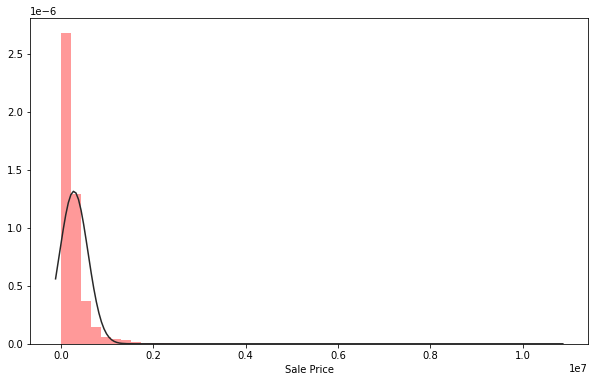

In [109]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.distplot(df2['Sale Price'],fit=norm, kde=False,color='red')

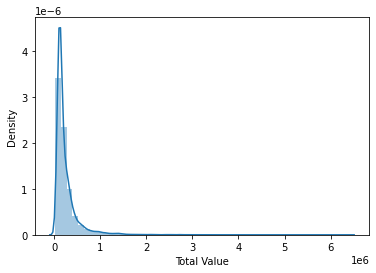

In [110]:
sns.distplot(df2['Total Value'])

Most of the houses are under $ 1.5 Million

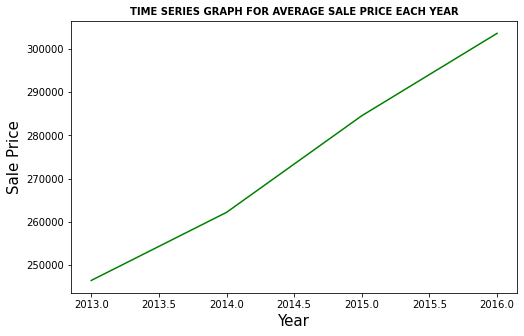

In [111]:
eda_frame=df2.groupby('Sale Year').agg({'Sale Price':'mean'}).reset_index()
plt.figure(figsize=[8,5])
plt.plot(list(eda_frame['Sale Year']),eda_frame['Sale Price'],color='green')
plt.title('TIME SERIES GRAPH FOR AVERAGE SALE PRICE EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Sale Price',fontsize = 15)
plt.show()

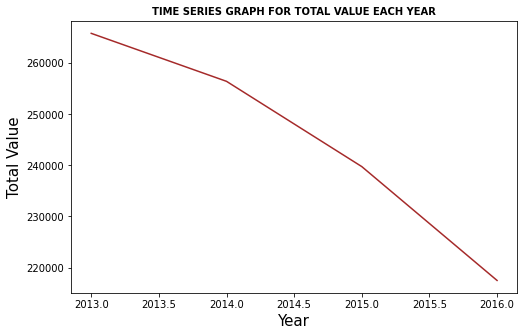

In [112]:
eda_frame=df2.groupby('Sale Year').agg({'Total Value':'mean'}).reset_index()
plt.figure(figsize=[8,5])
plt.plot(list(eda_frame['Sale Year']),eda_frame['Total Value'],color='brown')
plt.title('TIME SERIES GRAPH FOR TOTAL VALUE EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Value',fontsize = 15)
plt.show()

In [113]:
print("Sale Price mean:", round(df2['Sale Price'].mean(),2))
print("Sale Price median:", df2['Sale Price'].median())
print("Sale Price mode:", df2['Sale Price'].mode())

Sale Price mean: 275242.77
Sale Price median: 185000.0
Sale Price mode: 0    150000
dtype: int64


In [114]:
df2["Pricing level"] = np.where(df2['Sale Price'] > 185000, '0', '1') # 0 = overvalued, 1 = undervalued

In [115]:
df2["Pricing level"].value_counts()

1    11992
0    11923
Name: Pricing level, dtype: int64

In [116]:
df2 = df2.drop(['Sale Price'],axis=1)

In [117]:
df2.head(5)

,Land Use,Property City,Sold As Vacant,Acreage,Tax District,Neighborhood,Total Value,Foundation Type,Exterior Wall,Grade,Bedrooms,Half Bath,Sale Year,Sale Month,Pricing level
1,SINGLE FAMILY,NASHVILLE,No,0.17,URBAN SERVICES DISTRICT,3127.0,168300.0,PT BSMT,BRICK,C,2,0,2013,Jan,0
2,SINGLE FAMILY,NASHVILLE,No,0.11,CITY OF BERRY HILL,9126.0,191800.0,SLAB,BRICK/FRAME,C,3,1,2013,Jan,0
3,SINGLE FAMILY,NASHVILLE,No,0.17,URBAN SERVICES DISTRICT,3130.0,268700.0,FULL BSMT,BRICK/FRAME,B,4,0,2013,Jan,1
4,SINGLE FAMILY,NASHVILLE,No,0.34,URBAN SERVICES DISTRICT,3130.0,164800.0,CRAWL,FRAME,C,2,0,2013,Jan,1
5,SINGLE FAMILY,NASHVILLE,No,0.17,URBAN SERVICES DISTRICT,3130.0,113300.0,CRAWL,FRAME,C,2,0,2013,Jan,1


In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23915 entries, 1 to 56616
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Land Use         23915 non-null  object 
 1   Property City    23915 non-null  object 
 2   Sold As Vacant   23915 non-null  object 
 3   Acreage          23915 non-null  float64
 4   Tax District     23915 non-null  object 
 5   Neighborhood     23915 non-null  float64
 6   Total Value      23915 non-null  float64
 7   Foundation Type  23915 non-null  object 
 8   Exterior Wall    23915 non-null  object 
 9   Grade            23915 non-null  object 
 10  Bedrooms         23915 non-null  int64  
 11  Half Bath        23915 non-null  int64  
 12  Sale Year        23915 non-null  int64  
 13  Sale Month       23915 non-null  object 
 14  Pricing level    23915 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.9+ MB


In [133]:
#noexe
#df2['Neighborhood'] = df2['Neighborhood'].astype(int)
#df2['Total Value'] = df2['Total Value'].astype(int)

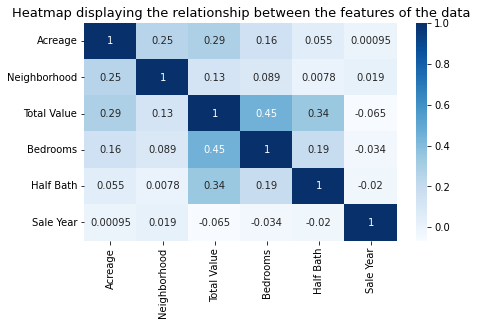

In [171]:
plt.figure(figsize=(7,4))
sns.heatmap(df2.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

In [180]:
c3 = df2.corr().abs().unstack()
c3.sort_values(ascending = False)[6:20:2]

Bedrooms      Total Value     0.454089
Total Value   Half Bath       0.343980
Acreage       Total Value     0.287729
Neighborhood  Acreage         0.251562
Half Bath     Bedrooms        0.194535
Acreage       Bedrooms        0.155230
Total Value   Neighborhood    0.125801
dtype: float64

In [77]:
df2_catcols = [col for col in df2.columns if df2[col].dtype=="O"]
df2_catcols

['Land Use',
 'Property City',
 'Sold As Vacant',
 'Tax District',
 'Foundation Type',
 'Exterior Wall',
 'Grade',
 'Sale Month',
 'Pricing level']

In [244]:
#df2.groupby('Pricing level').mean()

In [119]:
df2_dummy = pd.get_dummies(df2, columns=['Land Use', 'Property City', 'Sold As Vacant', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Sale Month', 'Grade'], drop_first=True)

In [121]:
#df2_dummy = df2_dummy.astype(float)
df2_dummy['Pricing level'] = df2_dummy['Pricing level'].astype("object")
df2_dummy['Acreage'] = df2_dummy['Acreage'].astype("float64")
df2_dummy['Bedrooms'] = df2_dummy['Bedrooms'].astype("float64")
df2_dummy['Half Bath'] = df2_dummy['Half Bath'].astype("float64")
df2_dummy['Sale Year'] = df2_dummy['Sale Year'].astype("float64")
df2_dummy['Pricing level'].value_counts()

1    11992
0    11923
Name: Pricing level, dtype: int64

In [122]:
df2_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23915 entries, 1 to 56616
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Acreage                                    23915 non-null  float64
 1   Neighborhood                               23915 non-null  float64
 2   Total Value                                23915 non-null  float64
 3   Bedrooms                                   23915 non-null  float64
 4   Half Bath                                  23915 non-null  float64
 5   Sale Year                                  23915 non-null  float64
 6   Pricing level                              23915 non-null  object 
 7   Land Use_CHURCH                            23915 non-null  uint8  
 8   Land Use_CLUB/UNION HALL/LODGE             23915 non-null  uint8  
 9   Land Use_CONVENIENCE MARKET WITHOUT GAS    23915 non-null  uint8  
 10  Land Use_DAY CARE CENT

In [123]:
df2_dummy.head()

,Acreage,Neighborhood,Total Value,Bedrooms,Half Bath,Sale Year,Pricing level,Land Use_CHURCH,Land Use_CLUB/UNION HALL/LODGE,Land Use_CONVENIENCE MARKET WITHOUT GAS,Land Use_DAY CARE CENTER,Land Use_DORMITORY/BOARDING HOUSE,Land Use_DUPLEX,Land Use_FOREST,Land Use_GREENBELT,Land Use_GREENBELT/RES\r\nGRRENBELT/RES,Land Use_LIGHT MANUFACTURING,Land Use_MOBILE HOME,Land Use_NON-PROFIT CHARITABLE SERVICE,Land Use_OFFICE BLDG (ONE OR TWO STORIES),Land Use_ONE STORY GENERAL RETAIL STORE,Land Use_PARSONAGE,Land Use_QUADPLEX,Land Use_RESIDENTIAL COMBO/MISC,Land Use_SINGLE FAMILY,Land Use_SPLIT CLASS,Land Use_STRIP SHOPPING CENTER,Land Use_TERMINAL/DISTRIBUTION WAREHOUSE,Land Use_TRIPLEX,Land Use_VACANT RES LAND,Land Use_VACANT RESIDENTIAL LAND,Land Use_ZERO LOT LINE,Property City_BRENTWOOD,Property City_GOODLETTSVILLE,Property City_HERMITAGE,Property City_JOELTON,Property City_MADISON,Property City_MOUNT JULIET,Property City_NASHVILLE,Property City_OLD HICKORY,...,Foundation Type_PIERS,Foundation Type_PT BSMT,Foundation Type_SLAB,Foundation Type_TYPICAL,Exterior Wall_BRICK/FRAME,Exterior Wall_CONC BLK,Exterior Wall_FRAME,Exterior Wall_FRAME/STONE,Exterior Wall_LOG,Exterior Wall_METAL,Exterior Wall_PRECAST CONC,Exterior Wall_STONE,Exterior Wall_STUCCO,Sale Month_Aug,Sale Month_Dec,Sale Month_Feb,Sale Month_Jan,Sale Month_Jul,Sale Month_Jun,Sale Month_Mar,Sale Month_May,Sale Month_Nov,Sale Month_Oct,Sale Month_Sep,Grade_AAC,Grade_B,Grade_C,Grade_D,Grade_E,Grade_IDC,Grade_OFB,Grade_OFC,Grade_OMB,Grade_SRC,Grade_SRD,Grade_SSC,Grade_TAC,Grade_TCC,Grade_TFC,Grade_X
1,0.17,3127.0,168300.0,2.0,0.0,2013.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.11,9126.0,191800.0,3.0,1.0,2013.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.17,3130.0,268700.0,4.0,0.0,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.34,3130.0,164800.0,2.0,0.0,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.17,3130.0,113300.0,2.0,0.0,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
#Highly correlated variables
corr1 = df2_dummy.corr()
c2 = corr1.abs().unstack()
c2.sort_values(ascending = False)[98:120:2]

Tax District_URBAN SERVICES DISTRICT      Tax District_GENERAL SERVICES DISTRICT    0.843637
Land Use_TERMINAL/DISTRIBUTION WAREHOUSE  Grade_IDC                                 0.816480
Grade_TCC                                 Land Use_CHURCH                           0.724272
Foundation Type_TYPICAL                   Grade_TCC                                 0.719886
Grade_OMB                                 Land Use_DAY CARE CENTER                  0.707092
Grade_X                                   Total Value                               0.675138
Grade_C                                   Grade_B                                   0.672874
Tax District_URBAN SERVICES DISTRICT      Neighborhood                              0.672683
Land Use_SINGLE FAMILY                    Land Use_DUPLEX                           0.636838
Tax District_GENERAL SERVICES DISTRICT    Property City_NASHVILLE                   0.623605
Property City_NASHVILLE                   Tax District_URBAN SERVICES 

In [ ]:
#-------------------------without scalling------------------------------

In [129]:
pd.set_option('display.max_rows', None)

In [181]:
#df2_dummy['Pricing level'] = df2_dummy['Pricing level'].astype(object)
X = df2_dummy.drop(columns='Pricing level')
x_constant = sm.add_constant(X)
y = df2_dummy['Pricing level']

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Acreage,2.087623
Neighborhood,2.688564
Total Value,4.365210
Bedrooms,1.627956
Half Bath,1.218076
Sale Year,1.066996
Land Use_CHURCH,inf
Land Use_CLUB/UNION HALL/LODGE,inf
Land Use_CONVENIENCE MARKET WITHOUT GAS,inf
Land Use_DAY CARE CENTER,inf


In [132]:
# features which has highly multicollinarity
vif_=pd.DataFrame({'vif': vif[1:]}, index=X.columns)
vif_[vif_['vif']>10]

,vif
Land Use_CHURCH,inf
Land Use_CLUB/UNION HALL/LODGE,inf
Land Use_CONVENIENCE MARKET WITHOUT GAS,inf
Land Use_DAY CARE CENTER,inf
Land Use_DORMITORY/BOARDING HOUSE,inf
Land Use_DUPLEX,inf
Land Use_FOREST,inf
Land Use_GREENBELT,inf
Land Use_GREENBELT/RES\r\nGRRENBELT/RES,inf
Land Use_LIGHT MANUFACTURING,inf


In [133]:
X = X.drop(columns=['Land Use_CHURCH','Land Use_DUPLEX','Land Use_QUADPLEX','Land Use_RESIDENTIAL COMBO/MISC','Land Use_SINGLE FAMILY','Land Use_TRIPLEX','Land Use_VACANT RES LAND','Land Use_VACANT RESIDENTIAL LAND','Land Use_ZERO LOT LINE','Tax District_GENERAL SERVICES DISTRICT','Tax District_URBAN SERVICES DISTRICT','Land Use_CLUB/UNION HALL/LODGE','Land Use_CONVENIENCE MARKET WITHOUT GAS','Land Use_LIGHT MANUFACTURING','Land Use_ONE STORY GENERAL RETAIL STORE','Land Use_STRIP SHOPPING CENTER','Land Use_TERMINAL/DISTRIBUTION WAREHOUSE','Foundation Type_TYPICAL'])

In [134]:
X = X.drop(columns=['Grade_AAC ','Grade_C   ','Grade_IDC ','Grade_OFB ','Grade_OFC ','Grade_OMB ','Grade_SRC ','Grade_SRD ','Grade_SSC ','Grade_TAC ','Grade_TCC ','Grade_TFC '])

In [556]:
#X = X.drop(columns=['Total Value'])

In [135]:
x_constant = sm.add_constant(X)

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Acreage,1.983415
Neighborhood,2.202188
Total Value,3.107207
Bedrooms,1.342448
Half Bath,1.182763
Sale Year,1.052207
Land Use_DAY CARE CENTER,1.001744
Land Use_DORMITORY/BOARDING HOUSE,1.004055
Land Use_FOREST,1.111531
Land Use_GREENBELT,1.253747


In [137]:
# features which has highly multicollinarity
vif_=pd.DataFrame({'vif': vif[1:]}, index=X.columns)
vif_[vif_['vif']>10]

,vif


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [183]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test)
print('Model accuracy score: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.83875


In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2677  814]
 [ 343 3341]]


In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      3491
           1       0.80      0.91      0.85      3684

    accuracy                           0.84      7175
   macro avg       0.85      0.84      0.84      7175
weighted avg       0.84      0.84      0.84      7175



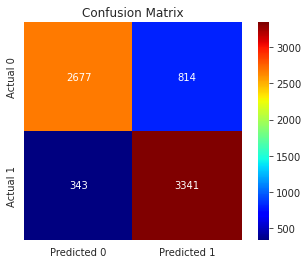

In [187]:
labels_1 = ['Predicted 0', 'Predicted 1']
labels_2 = ['Actual 0', 'Actual 1']
with sns.axes_style('whitegrid'):
    plt.figure()
    ax = sns.heatmap(confusion_matrix, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Confusion Matrix with percentage')

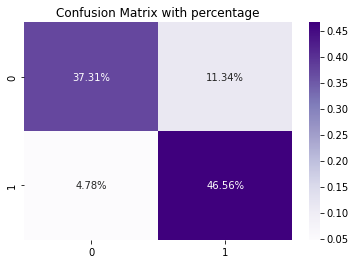

In [219]:
plt.figure()
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title("Confusion Matrix with percentage")

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00007
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00168
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: -0.00000
Feature: 32, Score: -0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score:

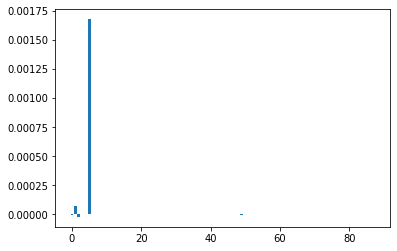

In [190]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [216]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=True)

In [217]:
importances

,Attribute,Importance
2,Total Value,-2.083817e-05
0,Acreage,-2.737826e-07
49,Foundation Type_PT BSMT,-1.374096e-07
44,Tax District_CITY OF OAK HILL,-5.871698e-08
32,Property City_GOODLETTSVILLE,-3.282823e-08
73,Grade_B,-2.927412e-08
42,Tax District_CITY OF FOREST HILLS,-2.268486e-08
31,Property City_BRENTWOOD,-1.771255e-08
47,Foundation Type_FULL BSMT,-1.518456e-08
59,Exterior Wall_STONE,-1.489966e-08


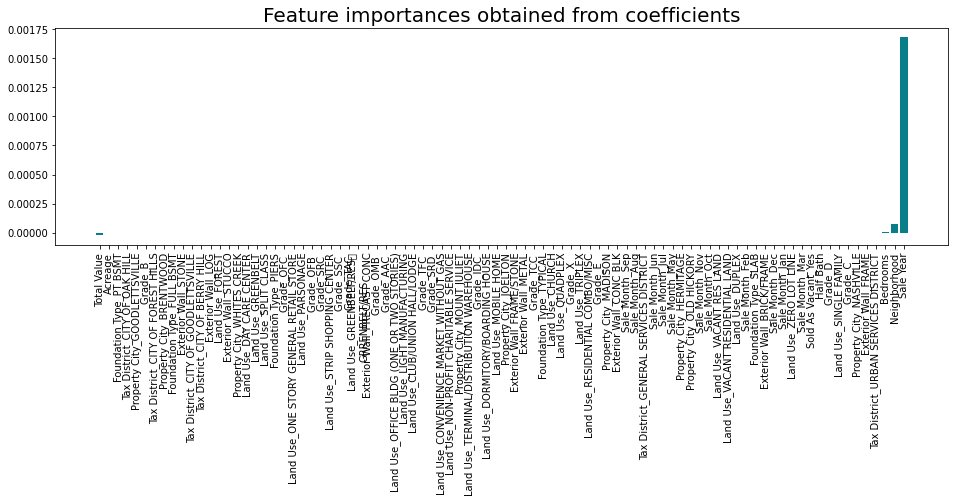

In [215]:
plt.figure(figsize=(16,4))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Decision Tree

In [221]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [222]:
#Accuracy

y_predict = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.8716376306620209

In [223]:
y_test.value_counts()

1    3684
0    3491
Name: Pricing level, dtype: int64

In [224]:
#Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)
print(classification_report(y_test, y_predict))

[[3059  432]
 [ 489 3195]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3491
           1       0.88      0.87      0.87      3684

    accuracy                           0.87      7175
   macro avg       0.87      0.87      0.87      7175
weighted avg       0.87      0.87      0.87      7175



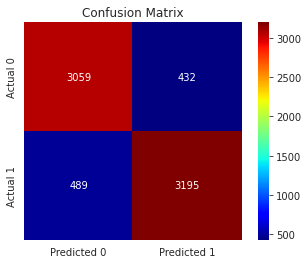

In [225]:
labels_1 = ['Predicted 0', 'Predicted 1']
labels_2 = ['Actual 0', 'Actual 1']
with sns.axes_style('whitegrid'):
    plt.figure()
    ax = sns.heatmap(confusion_matrix, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix")

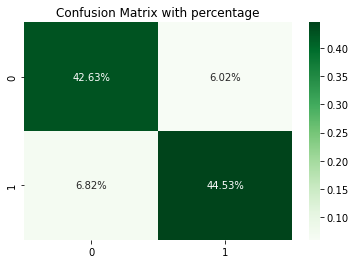

In [226]:
plt.figure()
plt.title("Confusion Matrix with percentage")
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Greens')

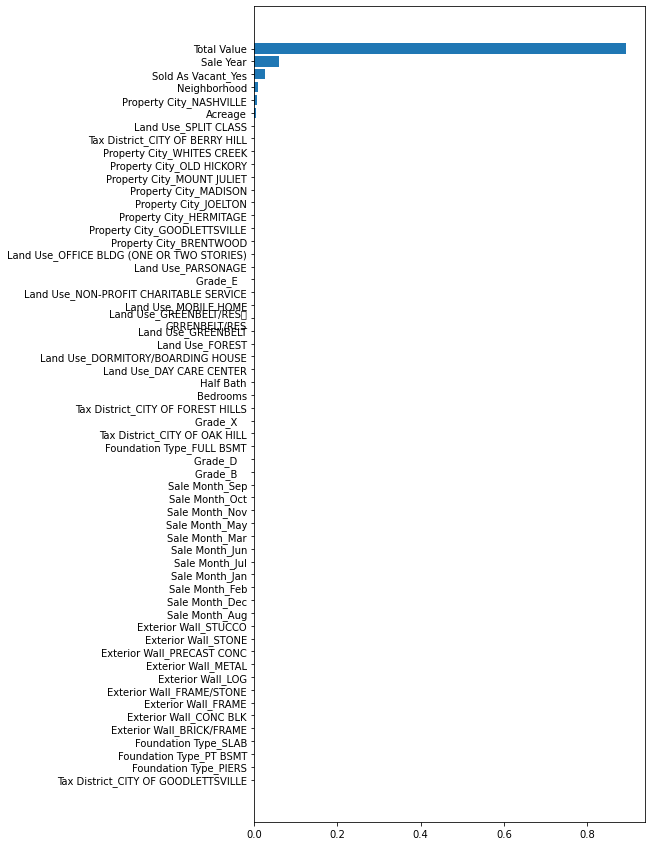

In [152]:
#Feature Importance
importances = dt_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(7,15))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])


### Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [154]:
#Accuracy

y_rf_predict = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_rf_predict)

0.8479442508710802

In [155]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_rf_predict))
print(classification_report(y_test, y_rf_predict))

[[2971  520]
 [ 571 3113]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3491
           1       0.86      0.85      0.85      3684

    accuracy                           0.85      7175
   macro avg       0.85      0.85      0.85      7175
weighted avg       0.85      0.85      0.85      7175



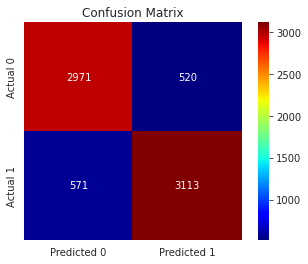

In [156]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_rf_predict)

labels_1 = ['Predicted 0', 'Predicted 1']
labels_2 = ['Actual 0', 'Actual 1']
with sns.axes_style('whitegrid'):
    plt.figure()
    ax = sns.heatmap(cf_matrix, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix")

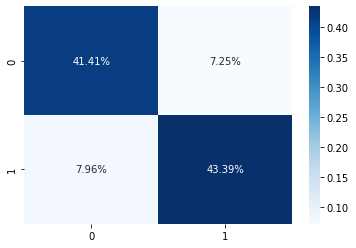

In [157]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

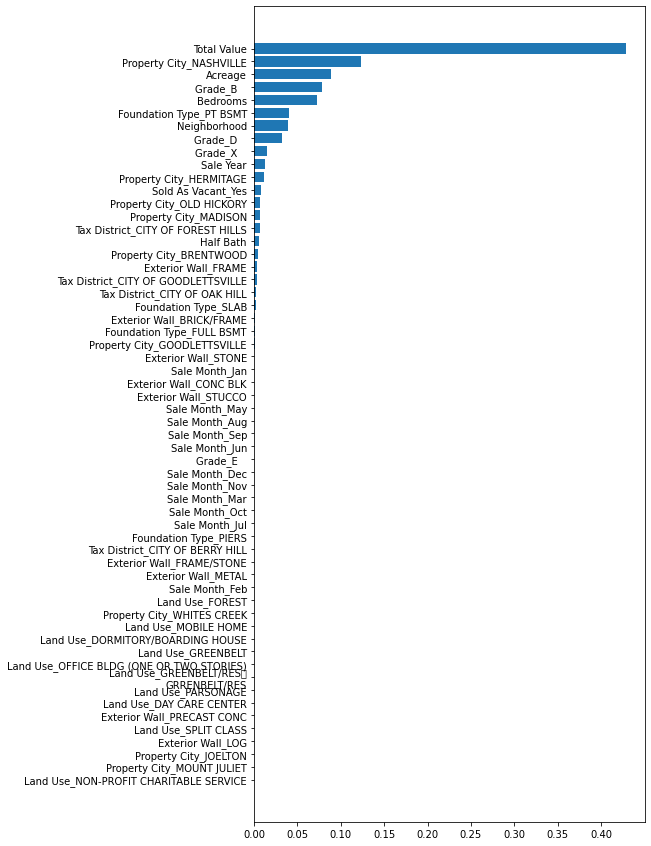

In [158]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(7,15))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

### GradientBoosting

In [227]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42,max_depth=9)   
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=9, random_state=42)

In [228]:
#Accuracy

y_gb_predict = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_gb_predict)

0.8882229965156795

In [229]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_gb_predict))
print(classification_report(y_test, y_gb_predict))

[[3137  354]
 [ 448 3236]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3491
           1       0.90      0.88      0.89      3684

    accuracy                           0.89      7175
   macro avg       0.89      0.89      0.89      7175
weighted avg       0.89      0.89      0.89      7175



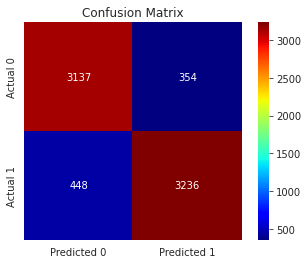

In [232]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_gb_predict)

labels_1 = ['Predicted 0', 'Predicted 1']
labels_2 = ['Actual 0', 'Actual 1']
with sns.axes_style('whitegrid'):
    plt.figure()
    ax = sns.heatmap(cf_matrix, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix")

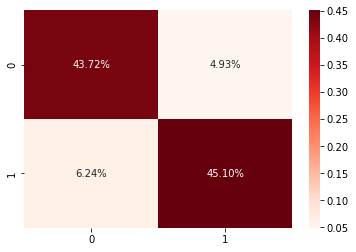

In [233]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

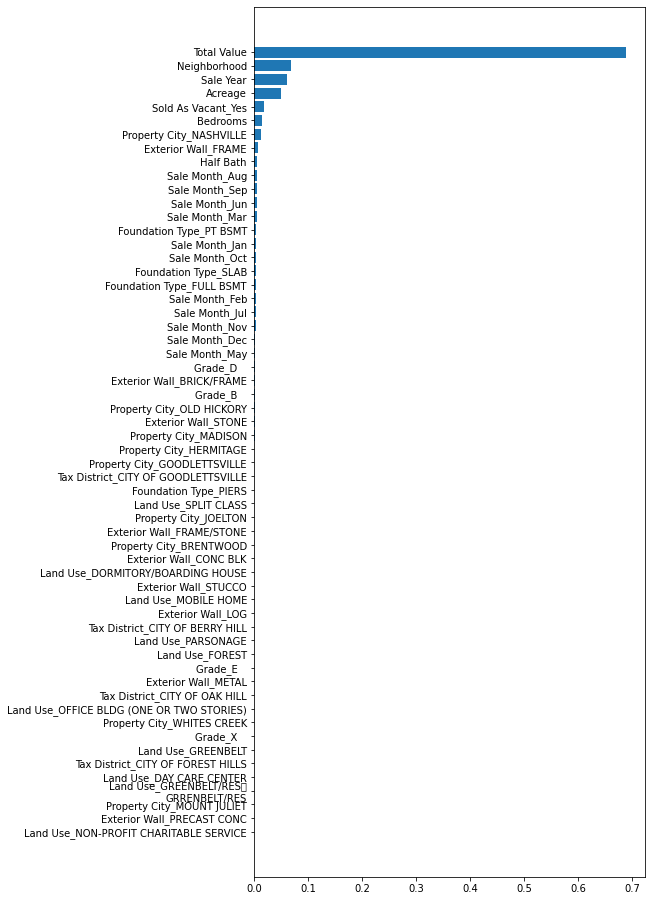

In [168]:
from IPython.core.pylabtools import figsize
#Feature Importance
importances = gb_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize = (7,16))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])